In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [6]:
df = pd.read_csv("50_startups.csv")
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

<Axes: xlabel='R&D Spend', ylabel='Profit'>

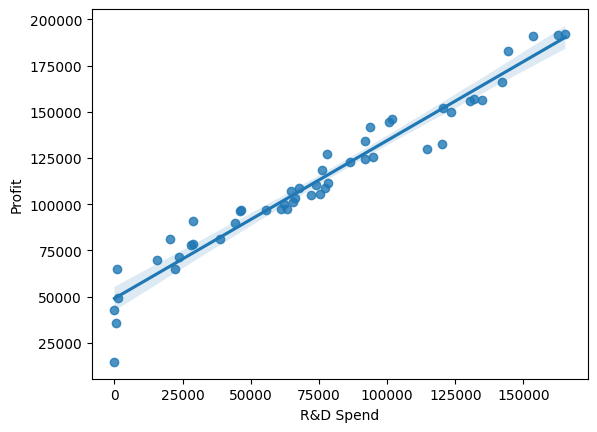

In [8]:
sns.regplot(df, x='R&D Spend', y='Profit')

<Axes: xlabel='Administration', ylabel='Profit'>

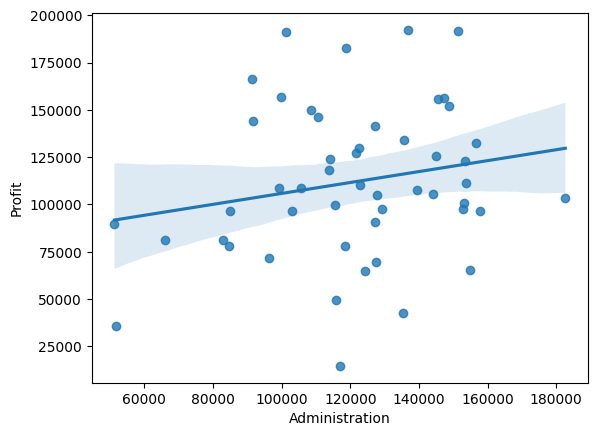

In [9]:
sns.regplot(df, x='Administration', y='Profit')

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

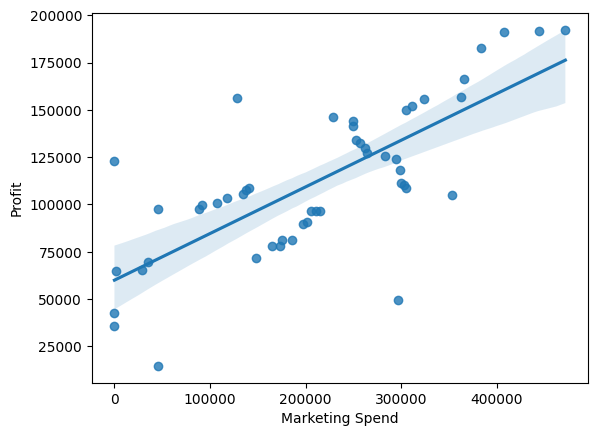

In [10]:
sns.regplot(df, x='Marketing Spend', y='Profit')

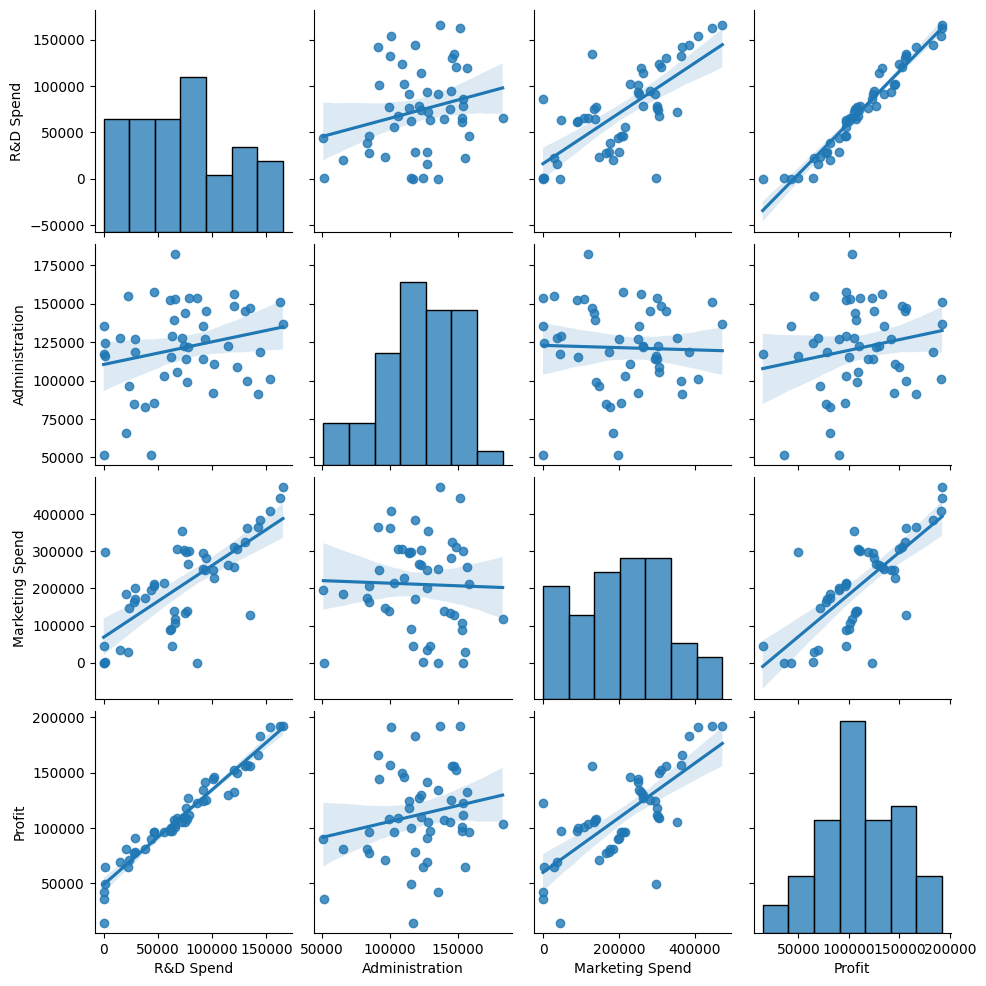

In [11]:
sns.pairplot(df, kind='reg')

<Axes: xlabel='State', ylabel='Profit'>

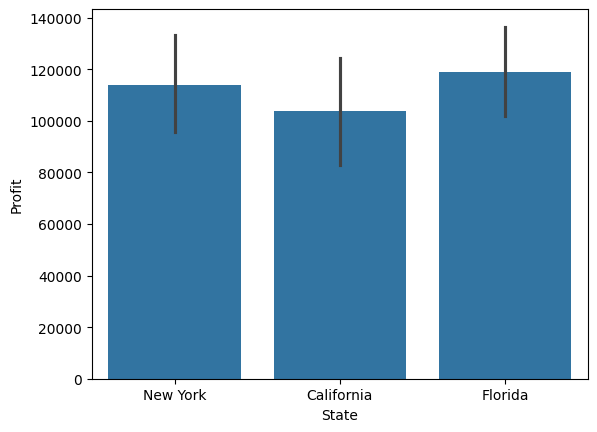

In [12]:
sns.barplot(df,x='State', y='Profit')

In [13]:
from sklearn.pipeline import Pipeline

In [14]:
import pandas as pd

x = pd.read_csv('50_startups.csv')# Make sure to replace with the correct file path

In [15]:
cat_cols = x.select_dtypes(include=['object']).columns
num_cols = x.select_dtypes(include=['number']).columns

print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

Categorical columns: Index(['State'], dtype='object')
Numerical columns: Index(['R&D Spend', 'Administration', 'Marketing Spend', 'Profit'], dtype='object')


In [16]:
x = df.drop(columns=['Profit'])
y = df['Profit']

In [17]:
print(x)

    R&D Spend  Administration  Marketing Spend       State
0   165349.20       136897.80        471784.10    New York
1   162597.70       151377.59        443898.53  California
2   153441.51       101145.55        407934.54     Florida
3   144372.41       118671.85        383199.62    New York
4   142107.34        91391.77        366168.42     Florida
5   131876.90        99814.71        362861.36    New York
6   134615.46       147198.87        127716.82  California
7   130298.13       145530.06        323876.68     Florida
8   120542.52       148718.95        311613.29    New York
9   123334.88       108679.17        304981.62  California
10  101913.08       110594.11        229160.95     Florida
11  100671.96        91790.61        249744.55  California
12   93863.75       127320.38        249839.44     Florida
13   91992.39       135495.07        252664.93  California
14  119943.24       156547.42        256512.92     Florida
15  114523.61       122616.84        261776.23    New Yo

In [18]:
print(y)

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Profit, dtype: float64


In [19]:
from sklearn.model_selection import train_test_split

# Assuming x and y are already defined as your features and labels
Xtrain, Xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=0)

In [20]:
cat_cols = x.select_dtypes(include=['object']).columns
num_cols = x.select_dtypes(include=['number']).columns

In [21]:
num_pipe=Pipeline(
    steps=[
        ('scaler',StandardScaler())
    ]
)

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

df = sns.load_dataset('penguins')
num_cols = df.select_dtypes('number').columns
cat_cols = df.select_dtypes(exclude='number').columns

num_pipeline = Pipeline(
    steps = (
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())
    )
)

In [28]:
cat_pipeline = Pipeline(
    steps = (
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(drop='first'))
    )
)

In [29]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_pipeline, num_cols),
        ('cat', cat_pipeline, cat_cols)
    ]
)

In [30]:
preprocessor.fit_transform(df)

array([[-0.88708123,  0.78774251, -1.42248782, ...,  0.        ,
         1.        ,  1.        ],
       [-0.81349399,  0.12655633, -1.06535169, ...,  0.        ,
         1.        ,  0.        ],
       [-0.66631952,  0.43171918, -0.42250666, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.1917582 , -0.73807176,  1.50602843, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.23512413, -1.19581604,  0.79175618, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.09977416, -0.53462985,  0.8631834 , ...,  0.        ,
         0.        ,  1.        ]], shape=(344, 9))

In [24]:
models=Pipeline([
    ('Preprocessor', preprocessor),
    ('lr', LinearRegression)
])

In [25]:
import gradio as gr

In [37]:
import gradio as gr
import pandas as pd
def prediction(R_D_Spend,Administration,Marketing_Spend,State,Profit):
    df = pd.DataFrame({
        'R_D_Speed': [R_D_Spend],
        'Administration': [Administration],
        'Marketing_Speed': [Marketing_Spend],
        'State': [State],
        'Profit': [Profit]
    })

    with open('models\multiple_linear_regression.pkl','rb') as f:
        model=load(f)

        profit = model.predict(df)
        return profit[0]
    
    ui = gr.Interface(
        fn = prediction,
        inputs = ['number', 'number', 'number', 'text'],
        outputs = gr.Text(),
        title = 'startups_Profit_Predication',
        examples = [[165349, 136897, 471784, 'New York']]
    )

    ui.launch()

<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
C:\Users\ARYAN\AppData\Local\Temp\ipykernel_5532\3128035029.py:12: SyntaxWarning: invalid escape sequence '\m'
  with open('models\multiple_linear_regression.pkl','rb') as f:
